# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
cityfile_path = "Resources/city_data.csv"
ridefile_path = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(cityfile_path)
ride_data_df = pd.read_csv(ridefile_path)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby("type").count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby("type").sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby("type").sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fares_per_ride = total_fares/total_rides
avg_fares_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fares_per_driver = total_fares/total_drivers
avg_fares_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":total_rides,
                                "Total Fares ($USD)": total_fares,
                                "Total Drivers":total_drivers,
                                "Average Fare per Ride":avg_fares_per_ride,
                                "Average Fare per Driver":avg_fares_per_driver})
pyber_summary_df

,Total Rides,Total Fares ($USD),Total Drivers,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,4327.93,78,34.623440,55.486282
Suburban,625,19356.33,490,30.970128,39.502714
Urban,1625,39854.38,2405,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Fares ($USD)"]= pyber_summary_df["Total Fares ($USD)"].map("${:,.2f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:1.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:1.2f}".format)
pyber_summary_df

,Total Rides,Total Fares ($USD),Total Drivers,Average Fare per Ride,Average Fare per Driver
Rural,125,"$4,327.93",78,$34.62,$55.49
Suburban,625,"$19,356.33",490,$30.97,$39.50
Urban,"1,625","$39,854.38","2,405",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
city_date_df=pyber_data_df.groupby(["date","type"]).sum()["fare"]
city_date_df

date            type    
1/1/2019 0:08   Urban       37.91
1/1/2019 0:46   Suburban    47.74
1/1/2019 12:32  Suburban    25.56
1/1/2019 14:40  Urban        5.42
1/1/2019 14:42  Urban       12.31
                            ...  
5/8/2019 1:54   Urban       32.69
5/8/2019 2:31   Urban       41.33
5/8/2019 4:20   Urban       21.99
5/8/2019 4:39   Urban       18.45
5/8/2019 7:29   Urban       18.55
Name: fare, Length: 2364, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
city_date_df=city_date_df.reset_index()
city_date_df

,date,type,fare
0,1/1/2019 0:08,Urban,37.91
1,1/1/2019 0:46,Suburban,47.74
2,1/1/2019 12:32,Suburban,25.56
3,1/1/2019 14:40,Urban,5.42
4,1/1/2019 14:42,Urban,12.31
...,...,...,...
2359,5/8/2019 1:54,Urban,32.69
2360,5/8/2019 2:31,Urban,41.33
2361,5/8/2019 4:20,Urban,21.99
2362,5/8/2019 4:39,Urban,18.45


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
city_date_pivot = city_date_df.pivot(index="date", columns = "type", values = "fare")

city_date_pivot.index = pd.to_datetime(city_date_pivot.index)
city_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
newcitydate_df = city_date_pivot.loc['2019-01-01':'2019-04-29']

C:\Users\Rahul\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
newcitydate_df.index = pd.to_datetime(newcitydate_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
newcitydate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_citydate_df = newcitydate_df.resample('w').sum()
weekly_citydate_df.tail()


type,Rural,Suburban,Urban
date,,,
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29
2019-05-05,67.60,167.92,342.63


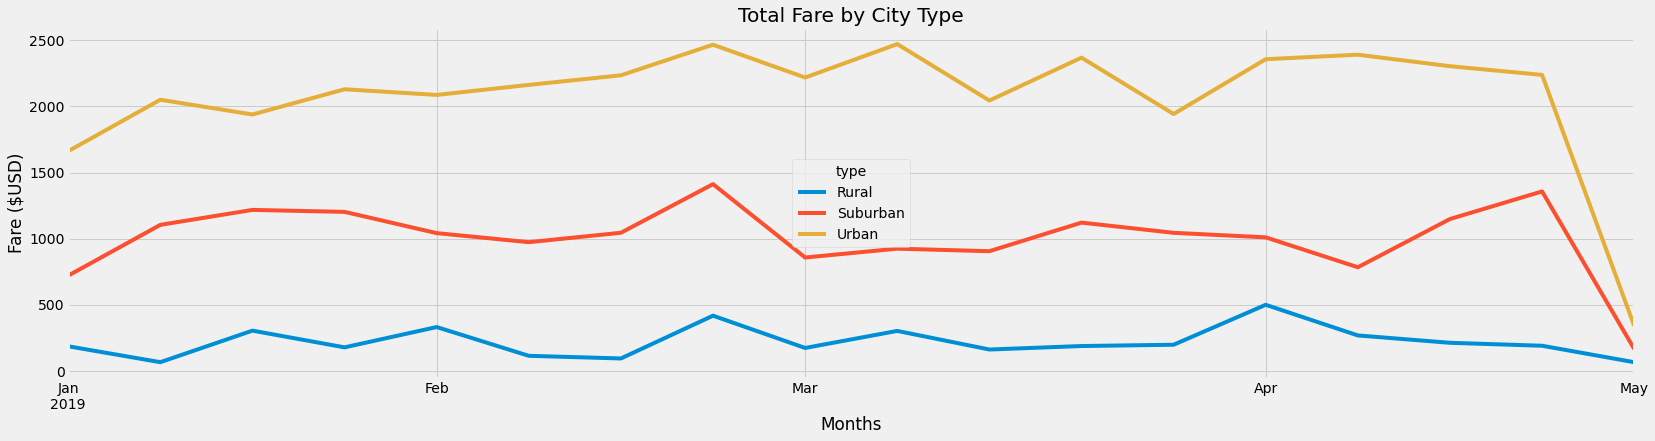

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

weekly_fare = weekly_citydate_df.plot(figsize=(25,6))
weekly_fare.set_title ("Total Fare by City Type")
weekly_fare.set_ylabel ("Fare ($USD)")
weekly_fare.set_xlabel ("Months")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig('Analysis/PyBer_fare_summary.png')
